# Neural Network for solving a Poisson equation

In [21]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

import seaborn as sns
#Setting theme
sns.set_theme(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
#imports
import torch
from hmpinn.utils.ml_utils import train
from hmpinn.plotting import plot_model_vs_analytical_contour
from hmpinn.differential_operators.laplacian import Laplacian
from hmpinn.models.model_v0 import ModelV0

## Example 1: Fitting the eigenfunctions

I will try to solve the following poisson problem
\begin{equation}
\Delta u = f(x, y)
\end{equation}

with boundary conditions:

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 0
\end{equation}

where

\begin{equation}
f(x, y) = -\sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

Clear the analytical solution to this is
\begin{equation}
u(x, y) = \frac{1}{2 \pi^2} \sin\left(\pi x\right) \sin\left(\pi y\right)
\end{equation}

In [23]:
from hmpinn.PDEs import EigenfunctionSourceDF
eigenfunction = EigenfunctionSourceDF()

In [24]:
model_1 = ModelV0(eigenfunction)
model_1.train()
train(model_1, n_epochs=100, optimizer_threshold=90)
model_2 = ModelV0(eigenfunction, has_embedding_layer=False)
model_2.train()
train(model_2, n_epochs=100, optimizer_threshold=90)
print("Done")

Using Cuda
Solving the PDE: EigenfunctionSourceDF(a=1, b=1, amplitude=1, backend=torch)


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


Using Cuda
Solving the PDE: EigenfunctionSourceDF(a=1, b=1, amplitude=1, backend=torch)


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

Done


In [25]:
x = torch.rand(10, 2, requires_grad=True)
model_1.eval()
print(Laplacian()(model_1, x))
print(Laplacian()(eigenfunction.u,x))

tensor([-0.8088, -0.2683, -0.0191, -0.4072, -0.7501, -0.2594, -0.7171, -0.9546,
        -0.8317, -0.0508], grad_fn=<AddBackward0>)
tensor([-0.8749, -0.2618, -0.0284, -0.4504, -0.7817, -0.2611, -0.7119, -0.9779,
        -0.8777, -0.0471], grad_fn=<AddBackward0>)


### Without embedding

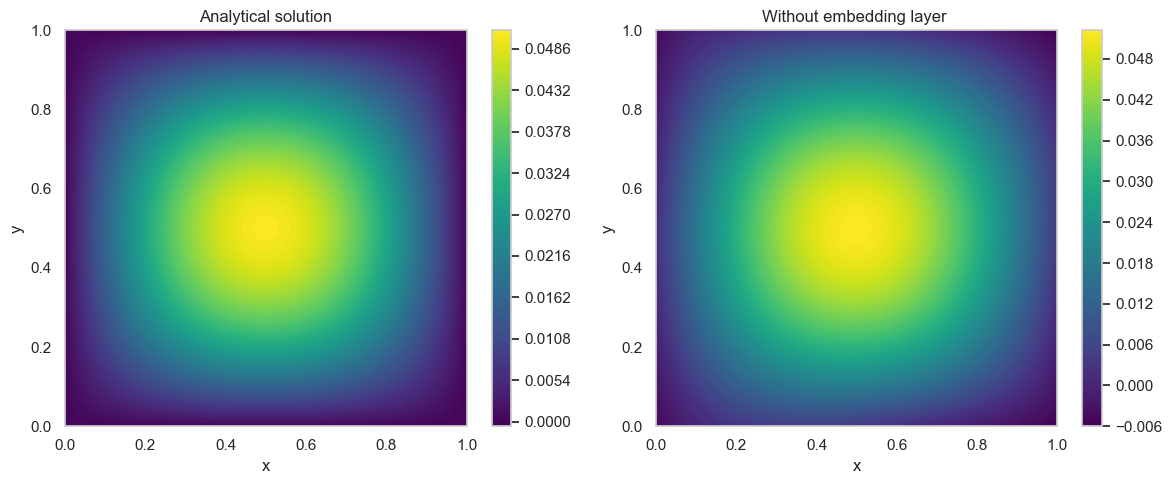

In [26]:
model_2.eval()
plot_model_vs_analytical_contour(model_2, title_model="Without embedding layer ", title_func="Analytical solution",)

### With embedding

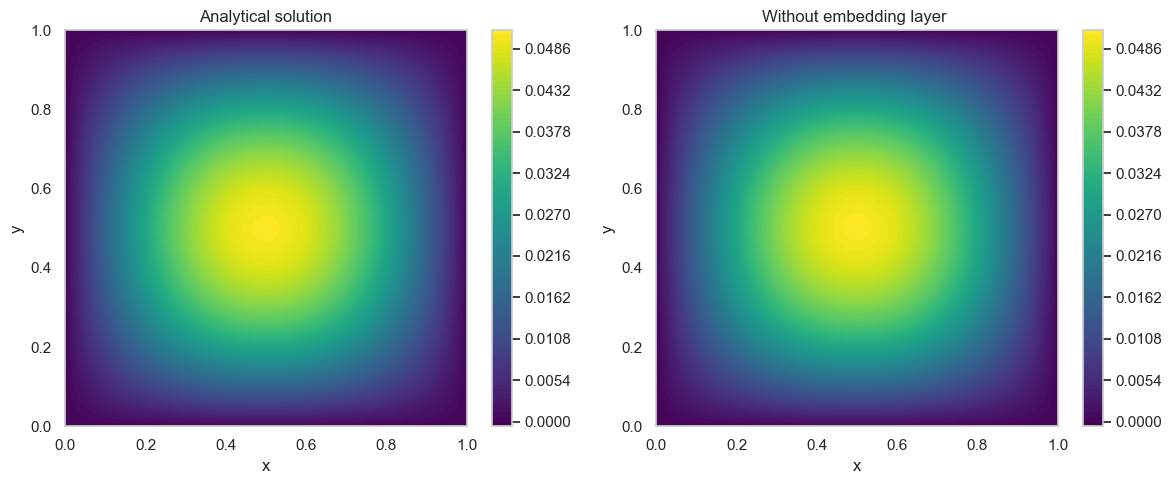

In [27]:
model_1.eval()
plot_model_vs_analytical_contour(model_1, title_model="Without embedding layer ", title_func="Analytical solution",)

## Example 2: Polynomial with inhomogeneous boundary condition

The solution \( u(x, y) \) for the Poisson equation
\begin{equation}
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = -2 ( y (1 - y) + x (1-x))
\end{equation}

with the boundary condition

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 5
\end{equation}

has analytical solution:

\begin{equation}
u(x, y) = x (1-x) y (1 - y)  + 5
\end{equation}



In [28]:
from hmpinn.PDEs import InhomoBCDF
poly_inhomo_BC = InhomoBCDF()

In [29]:
model_1 = ModelV0(poly_inhomo_BC)
model_1.train()
train(model_1, n_epochs=100, optimizer_threshold=90)
print("Done training model 1")
model_2 = ModelV0(poly_inhomo_BC, has_embedding_layer=False)
model_2.train()
train(model_2, n_epochs=100, optimizer_threshold=90)
print("Done training model 2")

Using Cuda
Solving the PDE: InhomoBCDF(backend=torch)


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


Done training model 1
Using Cuda
Solving the PDE: InhomoBCDF(backend=torch)


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

Done training model 2


In [30]:
model_1.eval()
model_2.eval()
x = torch.rand(10, 2, requires_grad=True)
print(Laplacian()(model_1, x))
print(Laplacian()(poly_inhomo_BC.u,x))

tensor([-0.5515, -0.5001, -0.6235, -0.9394, -0.5276, -0.9753, -0.8048, -0.6281,
        -0.9673, -0.6896], grad_fn=<AddBackward0>)
tensor([-0.6194, -0.5654, -0.5638, -0.8736, -0.5391, -0.9089, -0.6980, -0.6685,
        -0.9809, -0.6385], grad_fn=<AddBackward0>)


### Without embedding

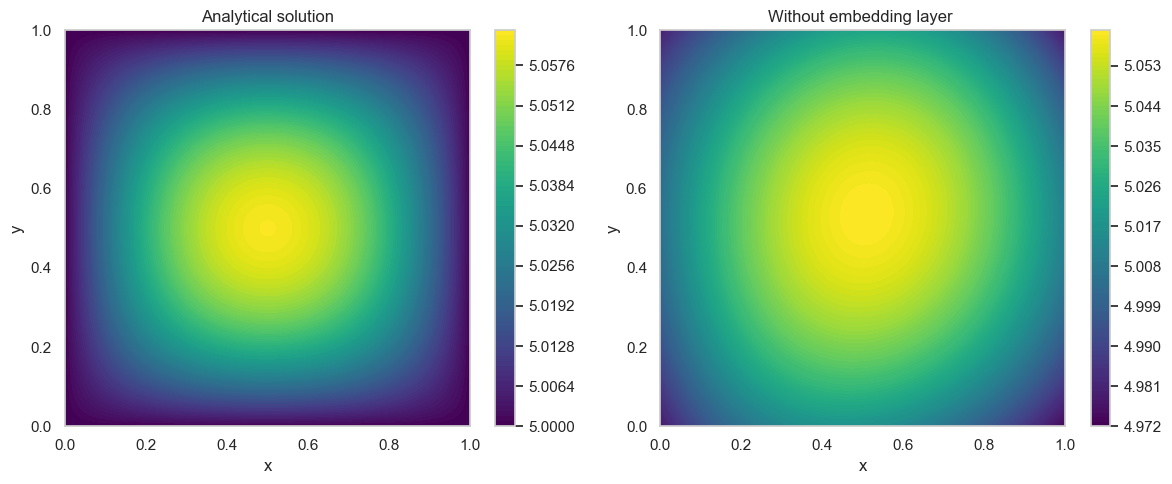

In [31]:
model_2.eval()
plot_model_vs_analytical_contour(model_2, title_model="Without embedding layer ", title_func="Analytical solution",)

### With embedding

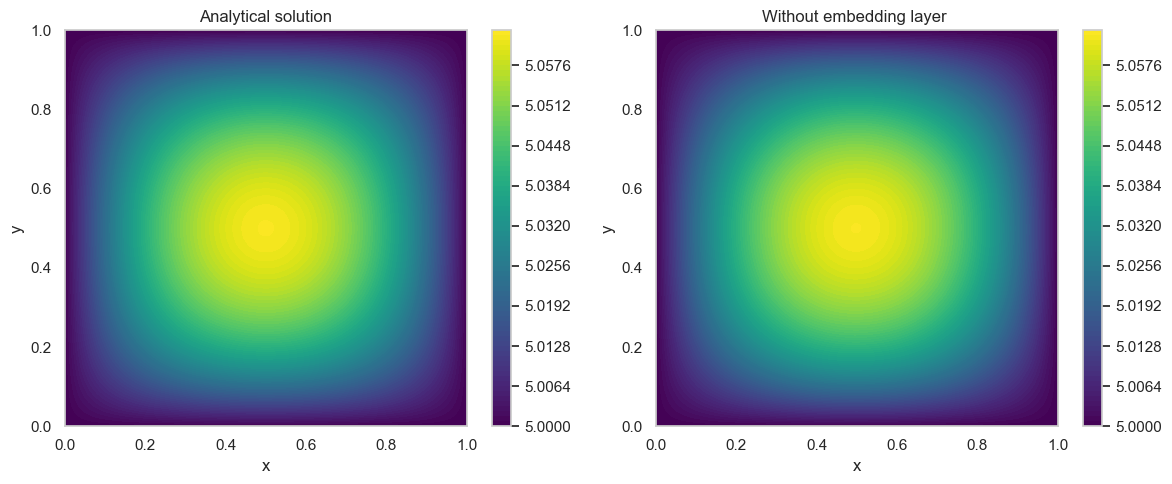

In [32]:
model_2.eval()
plot_model_vs_analytical_contour(model_1, title_model="Without embedding layer ", title_func="Analytical solution",)

## Example 3: Polynomial with diffusion

The solution \( u(x, y) \) for the Poisson equation
\begin{equation}
\nabla \cdot (k(x,y) \nabla u(x,y)) = f(x,y)
\end{equation}
with 

\begin{equation}
k(x,y) = \begin{pmatrix}
x^2 & x\\
y^2 & y
\end{pmatrix}
\end{equation}

and

\begin{equation}
f(x,y) = (2x - 6x^2)(y-y^2) + (1-2y)(2x-3x^2)+ (1-2x)(3y^2-4y^3) + (1-4y)(x-x^2)
\end{equation}



with the boundary condition

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 0
\end{equation}


has analytical solution:

\begin{equation}
u(x, y) = x (1-x) y (1 - y)
\end{equation}



In [33]:
from hmpinn.PDEs import NonSymDiffusion
poly_with_diff = NonSymDiffusion()

In [34]:
model_1 = ModelV0(poly_with_diff)
model_1.train()
train(model_1, n_epochs=100, optimizer_threshold=90)
print("Done training model 1")

Using Cuda
Solving the PDE: NonSymDiffusion(backend=torch)


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

Done training model 1


In [35]:
model_1.eval()
x = torch.rand(10, 2, requires_grad=True)
print(Laplacian()(model_1, x, k=poly_with_diff.diffusion_matrix))
print(Laplacian()(poly_with_diff.u,x, k=poly_with_diff.diffusion_matrix))

tensor([ 0.1137, -0.8691, -1.1958,  0.1348, -0.1779, -0.1395, -0.2236, -0.6251,
        -0.6644,  0.4038], grad_fn=<AddBackward0>)
tensor([ 0.1152, -0.8175, -1.1909,  0.1222, -0.1425, -0.1751, -0.1939, -0.5759,
        -0.6723,  0.3506], grad_fn=<AddBackward0>)


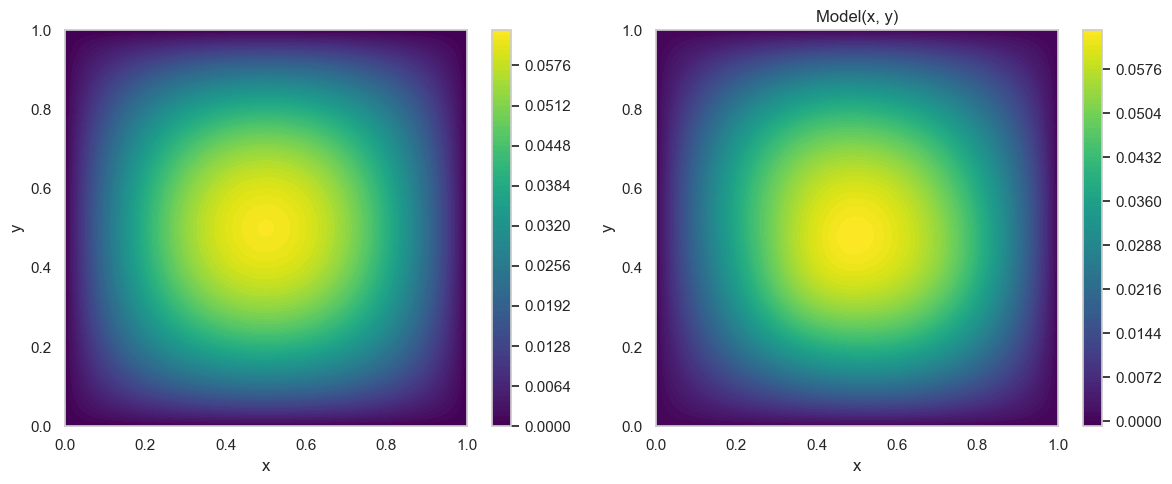

In [36]:
model_1.eval()
plot_model_vs_analytical_contour(model_1)

## Example 4: Polynomial with symmetric diffusion

The solution \( u(x, y) \) for the Poisson equation
\begin{equation}
\nabla \cdot (k(x,y) \nabla u(x,y)) = f(x,y)
\end{equation}
with 

\begin{equation}
k(x,y) = \begin{pmatrix}
x & xy\\
xy & y
\end{pmatrix}
\end{equation}

and

\begin{equation}
f(x,y) = (y - y^2)(1-4x) + (2x - 3x^2)(y-2y^2) + (2y - 3y^2)(x - 2x^2) + (x-x^2)(1-4y)
\end{equation}



with the boundary condition

\begin{equation}
u(0, y) = u(1, y) = u(x, 0) = u(x, 1) = 0
\end{equation}


has analytical solution:

\begin{equation}
u(x, y) = x (1-x) y (1 - y)
\end{equation}



In [37]:
from hmpinn.PDEs import SymDiffusion
poly_with_sym_diff = SymDiffusion()

In [38]:
model_1 = ModelV0(poly_with_sym_diff)
model_1.train()
train(model_1, n_epochs=100, optimizer_threshold=90)
print("Done training model 1")

Using Cuda
Solving the PDE: SymDiffusion(backend=torch)


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

Done training model 1


In [39]:
model_1.eval()
x = torch.rand(10, 2, requires_grad=True)
print(Laplacian()(model_1, x, k=poly_with_sym_diff.diffusion_matrix))
print(Laplacian()(poly_with_sym_diff.u,x, k=poly_with_sym_diff.diffusion_matrix))

tensor([-0.4932, -0.5162, -0.4012,  0.0387, -0.2459, -1.1129, -0.1736, -0.2581,
        -0.9146, -0.8134], grad_fn=<AddBackward0>)
tensor([-0.5354, -0.5147, -0.4501,  0.0284, -0.2509, -1.0386, -0.1410, -0.2653,
        -0.9054, -0.8008], grad_fn=<AddBackward0>)


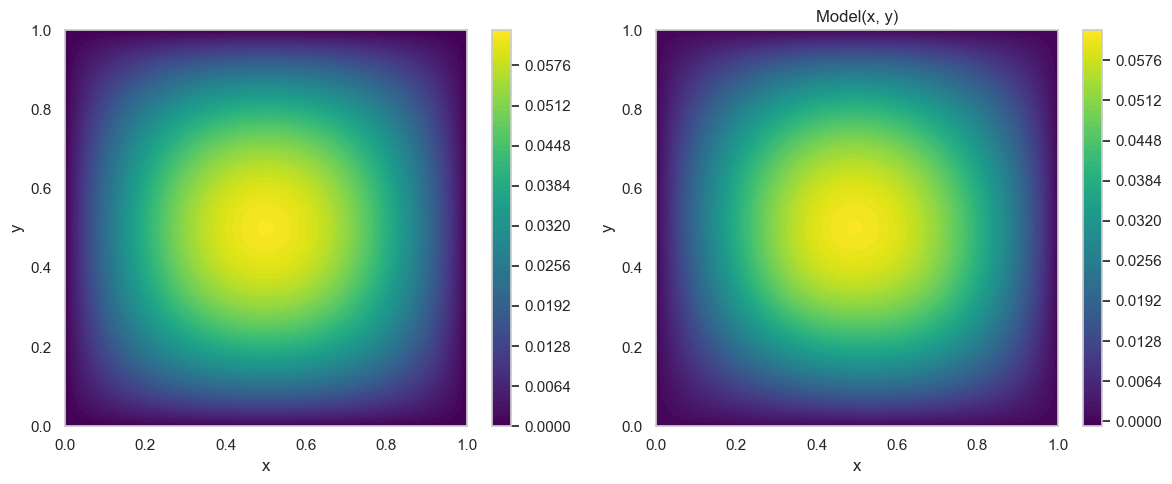

In [40]:
model_1.eval()
plot_model_vs_analytical_contour(model_1)